In [10]:
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-myue6nc4
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-myue6nc4
     |████████████████████████████████| 2.9 MB 4.9 MB/s 
     |████████████████████████████████| 3.3 MB 16.4 MB/s 
     |████████████████████████████████| 948 kB 52.7 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34556 sha256=bf3d540f3bce7df768038ded799c967857a243c41ad90ffb12bfc75c5d3d723a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4qhinxu2/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfu

In [11]:
%reset -f
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import cv2

In [12]:
import os 
lista1 = os.listdir('/content/mappe')

In [13]:

lista2 = os.listdir('/content/immag')

In [14]:
#associa ad ogni mappa la sua immag
lista = []

for elem1 in lista1:
  elem1t = elem1.split('out')[0]
  for elem2 in lista2:
    elem2t = elem2.split('.')[0]
    if elem1t == elem2t:
      lista.append((elem2,elem1))

print(lista)

[('ZlIseyu88ZRt6zHUMZb-Ag.jpg', 'ZlIseyu88ZRt6zHUMZb-Agout.jpg'), ('photo1626970083.jpeg', 'photo1626970083out.jpg'), ('ZReUxTgnavhoEd17nnxKMQ.jpg', 'ZReUxTgnavhoEd17nnxKMQout.jpg'), ('napoli7.jpg', 'napoli7out.jpg'), ('zZjYKIN7hLJ9uTMsVpClNw.jpg', 'zZjYKIN7hLJ9uTMsVpClNwout.jpg'), ('ZpgCh6Dv_lHheS3UhlGmtg.jpg', 'ZpgCh6Dv_lHheS3UhlGmtgout.jpg'), ('zxQZ0wp3_HvJeinpEJKOOQ.jpg', 'zxQZ0wp3_HvJeinpEJKOOQout.jpg'), ('napoli2.png', 'napoli2out.jpg'), ('Z8HD6Drv-f1ihS8RezXFyQ.jpg', 'Z8HD6Drv-f1ihS8RezXFyQout.jpg'), ('napoli5.jpg', 'napoli5out.jpg'), ('napoli6.jpg', 'napoli6out.jpg'), ('ZyLMHl2pTQs_4Lt3Nj1K4A.jpg', 'ZyLMHl2pTQs_4Lt3Nj1K4Aout.jpg'), ('napoli3.png', 'napoli3out.jpg'), ('napoli8.jpeg', 'napoli8out.jpg'), ('napoli4.jpg', 'napoli4out.jpg'), ('ZuA6t4k58swnvWsySKdihg.jpg', 'ZuA6t4k58swnvWsySKdihgout.jpg'), ('-zZvqUIoMscnxGRg_b6AWA.jpg', '-zZvqUIoMscnxGRg_b6AWAout.jpg')]


In [15]:
from keras_segmentation.predict import get_colored_segmentation_image

color_map = np.asarray([
      [165, 42, 42],
      [0, 192, 0],
      [196, 196, 196],
      [190, 153, 153],
      [180, 165, 180],
      [102, 102, 156],
      [102, 102, 156],
      [128, 64, 255],
      [140, 140, 200],
      [170, 170, 170],
      [250, 170, 160],
      [96, 96, 96],
      [230, 150, 140],
      [128, 64, 128],
      [110, 110, 110],
      [244, 35, 232],
      [150, 100, 100],
      [70, 70, 70],
      [150, 120, 90],
      [220, 20, 60],
      [255, 0, 0],
      [255, 0, 0],
      [255, 0, 0],
      [200, 128, 128],
      [255, 255, 255],
      [64, 170, 64],
      [128, 64, 64],
      [70, 130, 180],
      [255, 255, 255],
      [152, 251, 152],
      [107, 142, 35],
      [0, 170, 30],
      [255, 255, 128],
      [250, 0, 30],
      [0, 0, 0],
      [220, 220, 220],
      [170, 170, 170],
      [222, 40, 40],
      [100, 170, 30],
      [40, 40, 40],
      [33, 33, 33],
      [170, 170, 170],
      [0, 0, 142],
      [170, 170, 170],
      [210, 170, 100],
      [153, 153, 153],
      [128, 128, 128],
      [0, 0, 142],
      [250, 170, 30],
      [192, 192, 192],
      [220, 220, 0],
      [180, 165, 180],
      [119, 11, 32],
      [0, 0, 142],
      [0, 60, 100],
      [0, 0, 142],
      [0, 0, 90],
      [0, 0, 230],
      [0, 80, 100],
      [128, 64, 64],
      [0, 0, 110],
      [0, 0, 70],
      [0, 0, 192],
      [32, 32, 32],
      [0, 0, 0],
      [0, 0, 0],
      ])



In [28]:
def convertitore(path_input,path_mappa,color_map):
  out = io.imread(path_mappa)
  output = get_colored_segmentation_image(out,66,color_map)/255
  x = io.imread(path_input)/255
  output = cv2.resize(output, (x.shape[1], x.shape[0]), interpolation=cv2.INTER_NEAREST)
  return output

path_immag = '/content/immag/'
path_mappe = '/content/mappe/'


output = convertitore(path_immag+lista[0][0],path_mappe+lista[0][1],color_map)





ValueError: ignored

In [26]:
 out = io.imread(path_mappe+lista[0][1])

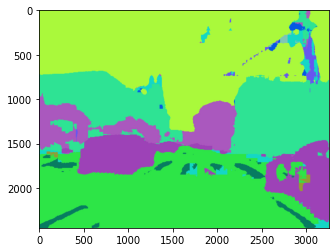

In [35]:
plt.figure(1)
plt.imshow(out)